In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from matplotlib.patches import Patch
import scipy

import pickle
import itertools
from concurrent.futures import ProcessPoolExecutor

from matplotlib.lines import Line2D
import matplotlib as mpl
import pandas as pd
import seaborn as sns




In [2]:

# Get the current working directory
current_dir = os.getcwd()

# Navigate to 'network_simulations'
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))

# Navigate to the sibling directory '00_opinion_function_setup'
sibling_dir = os.path.join(parent_dir, "00_opinion_function_setup")

# Add the sibling directory to sys.path for importing
if sibling_dir not in sys.path:
    sys.path.append(sibling_dir)

# Import the module from 00_opinion_function_setup
import opinion_functions as fun  
import generate_homophilic_graph_symmetric 

## generate simulation

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

linewidth=0.5
dpival=200

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors=['#19bdff','#f2d138'] #majority/minority
greycolor='#626262'
lightgreycolor='#c4c4c4'
myblack='#222222'

In [4]:
def customize_axes(ax,myblack):
    ax.spines['top'].set_color(myblack)
    ax.spines['bottom'].set_color(myblack)
    ax.spines['left'].set_color(myblack)
    ax.spines['right'].set_color(myblack)
    ax.xaxis.label.set_color(myblack)
    ax.yaxis.label.set_color(myblack)
    ax.title.set_color(myblack)
    ax.tick_params(axis='x', colors=myblack)
    ax.tick_params(axis='y', colors=myblack)

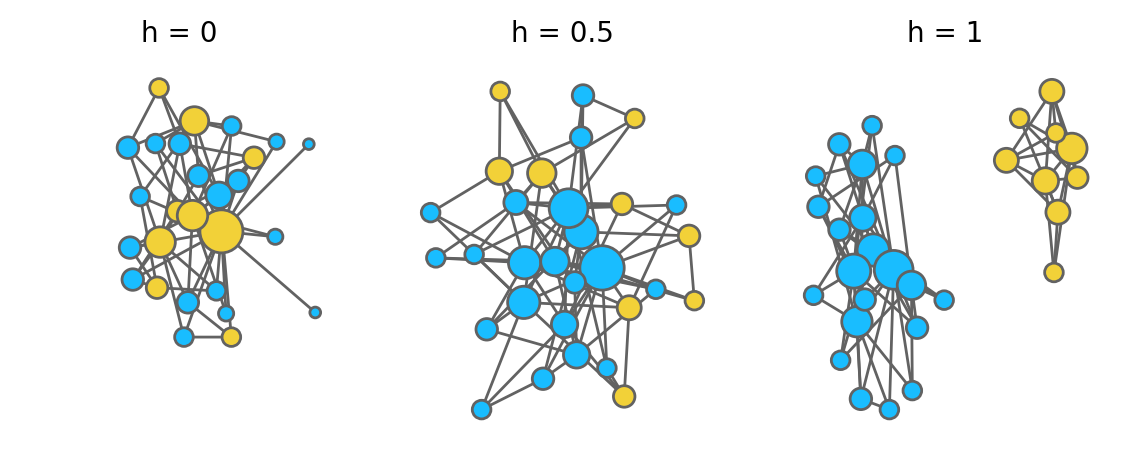

In [5]:
seedval=11
num_agents=30
m=3
minority_fraction=0.33
homophilyvec=[0,0.5,1]


# Create a grid of subplots
fig, axs = plt.subplots(1, 3, dpi=dpival, figsize=(7, 2.5), sharey=False)


for i in range(len(homophilyvec)):
    homophily = homophilyvec[i]
    G, minority_nodes = generate_homophilic_graph_symmetric.homophilic_ba_graph(N=num_agents, m=m, minority_fraction=minority_fraction, homophily=homophily, seed=seedval)


    color = nx.get_node_attributes(G, 'color')
    d = dict(G.degree)
    pos = nx.spring_layout(G, k=0.8, seed=seedval)

    axs[i].set_title('h = '+str(homophily))
    nx.draw_networkx_edges(G, pos=pos, edge_color=greycolor, ax=axs[i])
    nx.draw_networkx_nodes(
        G, pos=pos, nodelist=color.keys(),
        node_size=[v*15 for v in d.values()],
        node_color=list(color.values()),
        cmap=plt.cm.Reds_r, linewidths=1, edgecolors=greycolor, ax=axs[i]
    )
    axs[i].axis('off')




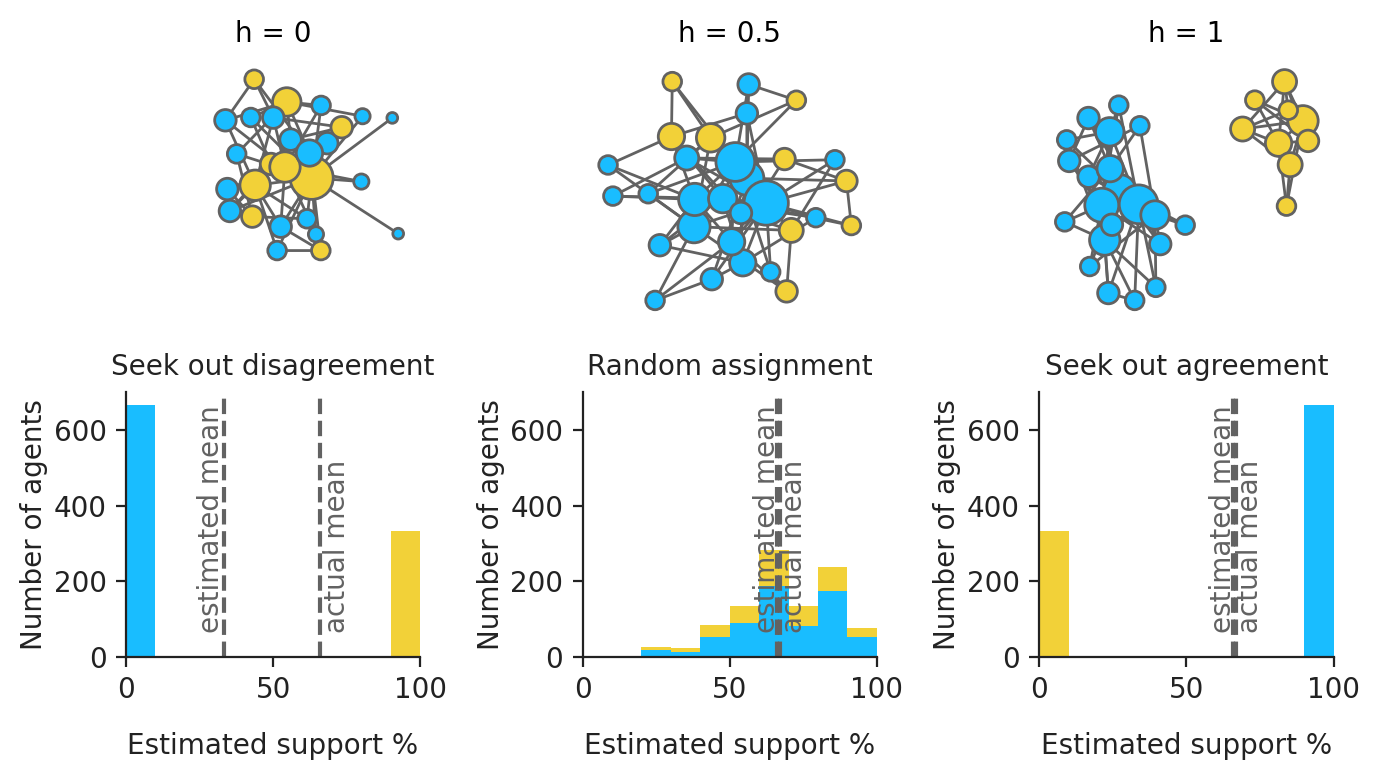

In [6]:
# Create a grid of subplots
fig, axs = plt.subplots(2, 3, dpi=dpival, figsize=(7, 4), sharey=False)

seedval=11
num_agents=30
m=3
minority_fraction=0.33
homophilyvec=[0,0.5,1]
for i in range(len(homophilyvec)):
    homophily = homophilyvec[i]
    G, minority_nodes = generate_homophilic_graph_symmetric.homophilic_ba_graph(N=num_agents, m=m, minority_fraction=minority_fraction, homophily=homophily, seed=seedval)


    color = nx.get_node_attributes(G, 'color')
    d = dict(G.degree)
    pos = nx.spring_layout(G, k=0.8, seed=seedval)

    axs[0,i].set_title('h = '+str(homophily))
    nx.draw_networkx_edges(G, pos=pos, edge_color=greycolor, ax=axs[0,i])
    nx.draw_networkx_nodes(
        G, pos=pos, nodelist=color.keys(),
        node_size=[v*15 for v in d.values()],
        node_color=list(color.values()),
        cmap=plt.cm.Reds_r, linewidths=1, edgecolors=greycolor, ax=axs[0,i]
    )
    axs[0,i].axis('off')


modelylim=700
num_swaps=101
homophilyvec=[0,0.5,1]
num_agents=1000
minority_fraction=0.333
majority_fraction=1-minority_fraction
m=5

dpival=300

title_vec=['Seek out disagreement','Random assignment', 'Seek out agreement']

for i in range(len(homophilyvec)):
    homophily=homophilyvec[i]
    G,minority_nodes = generate_homophilic_graph_symmetric.homophilic_ba_graph(N=num_agents, m=m, minority_fraction=minority_fraction, homophily=homophily)


    true_opinion,perceived_opinion=fun.generate_perceived_opinion(G,minority_nodes,{},narcissistic=False,weigh_connected=False)

    minority_opinion = [perceived_opinion[i] for i in minority_nodes]
    minority_misperception = [(1-minority_fraction)-perceived_opinion[i] for i in minority_nodes]
    majority_opinion = [perceived_opinion[x] for x in np.arange(len(perceived_opinion)) if x not in minority_nodes]
    majority_misperception = [(1-minority_fraction)-perceived_opinion[x] for x in np.arange(len(perceived_opinion)) if x not in minority_nodes]

    perceived_opinion_percent = [i * 100 for i in perceived_opinion]
    majority_opinion_percent=[i * 100 for i in majority_opinion]
    minority_opinion_percent=[i * 100 for i in minority_opinion]

    axs[1,i].set_title(title_vec[i])
    axs[1,i].hist([majority_opinion_percent, minority_opinion_percent], 10, histtype='bar', stacked=True, color=colors, density=False)
    axs[1,i].set_xlabel("Estimated support %", labelpad=10, size=SMALL_SIZE)
    axs[1,i].set_ylabel("Number of agents", labelpad=2, size=SMALL_SIZE)
    axs[1,i].axvline(x=66, color=greycolor, linestyle='--')
    axs[1,i].text(66+1, 80, 'actual mean', rotation=90, color=greycolor)
    axs[1,i].axvline(x=np.mean(perceived_opinion_percent), color=greycolor, linestyle='--')
    axs[1,i].text(np.mean(perceived_opinion_percent)-9, 80, 'estimated mean', rotation=90, color=greycolor,size=SMALL_SIZE)
    axs[1,i].set_xlim(0, 100)
    axs[1,i].set_ylim(0, modelylim)
    sns.despine(ax=axs[1,i])
    #axs[i].set_title('Model output: both factions',size=MEDIUM_SIZE)
    
    customize_axes(axs[1,i],myblack=myblack)

plt.tight_layout()
# plt.savefig('figures/homophily_plot.pdf')
plt.show()
